### Data Preparation

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns= None

In [3]:
df_start=pd.read_csv('/Users/pushkarsinghbhauryal/Downloads/data.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})
print('Initial Shape:', df_start.shape)

Initial Shape: (541909, 8)


In [4]:
print(df_start.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB
None


In [6]:
# Convert InvoiceDate to Datetime 
df_start.InvoiceDate= pd.to_datetime(df_start.InvoiceDate).dt.date

In [7]:
# Missing Value Identification
Missing_info=pd.DataFrame(df_start.dtypes).T.rename(index={0:'column type'})
Missing_info= Missing_info.append(pd.DataFrame(df_start.isnull().sum()).T.rename(index={0:'Null Values'}))
Missing_info= Missing_info.append(pd.DataFrame(df_start.isnull().sum()/df_start.shape[0]*100).T.rename(index={0:'Null Values %'}))



In [8]:
Missing_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,object,float64,object,object
Null Values,0,0,1454,0,0,0,135080,0
Null Values %,0,0,0.268311,0,0,0,24.9267,0


In [9]:
df_start.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [10]:
# Missing value Deletion 
df_start.dropna(axis=0,subset=['CustomerID'],inplace=True)
Missing_info=pd.DataFrame(df_start.dtypes).T.rename(index={0:'column type'})
Missing_info= Missing_info.append(pd.DataFrame(df_start.isnull().sum()).T.rename(index={0:'Null Values'}))
Missing_info= Missing_info.append(pd.DataFrame(df_start.isnull().sum()/df_start.shape[0]*100).T.rename(index={0:'Null Values %'}))
Missing_info


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,object,float64,object,object
Null Values,0,0,0,0,0,0,0,0
Null Values %,0,0,0,0,0,0,0,0


In [11]:
# Remove duplicates
print('Duplicate Entrees:{}'.format(df_start.duplicated().sum()) )
df_start.drop_duplicates(inplace=True)

Duplicate Entrees:5226


### Exploratory Data Alalysis

In [12]:
# Distinct Count for products, transection , customer, Country
pd.DataFrame([{
    'Products': len(df_start.StockCode.value_counts()),
    'Transections': len(df_start.InvoiceNo.value_counts()),
    'Customer': len(df_start.InvoiceNo.value_counts()),
    'Country':len(df_start.Country.value_counts())
}],index=['Count'])


,Country,Customer,Products,Transections
Count,37,22190,3684,22190


In [13]:
# Number of Distinct product purcheses per transection 

temp = df_start.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


In [14]:
# # Number of product perchased per transection 
# temp = df_start.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['Quantity'].sum()
# nb_products_per_basket = temp.rename(columns = {'Quantity':'Number of products'})
# nb_products_per_basket[:10].sort_values('CustomerID')

In [15]:
# Cancled Order 
nb_products_per_basket['Canceld_Order']= nb_products_per_basket.InvoiceNo.apply(lambda x: int('C' in x))
nb_products_per_basket[:10]

,CustomerID,InvoiceNo,Number of products,Canceld_Order
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0
5,12347,556201,18,0
6,12347,562032,22,0
7,12347,573511,47,0
8,12347,581180,11,0
9,12348,539318,17,0


In [16]:
n1= nb_products_per_basket.Canceld_Order.sum()
n2= nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 3654/22190 (16.47%) 


In [17]:
df_cleaned = df_start.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []



In [18]:
for index, col in  df_start.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_start[(df_start['CustomerID'] == col['CustomerID']) &
                         (df_start['StockCode']  == col['StockCode']) & 
                         (df_start['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_start['Quantity']   > 0)].copy()
    
    
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break 
    
    
    
    
    
    

In [19]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 7130
doubtfull_entry: 1609


In [20]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)

In [21]:
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries

nb of entries to delete: 56


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10,0.70,16422,United Kingdom,0
141938,C548532,22423,REGENCY CAKESTAND 3 TIER,-48,2011-03-31,10.95,14031,United Kingdom,0
151173,C549544,21035,SET/2 RED RETROSPOT TEA TOWELS,-100,2011-04-10,2.75,15311,United Kingdom,0
156900,C550181,20676,RED RETROSPOT BOWL,-12,2011-04-14,1.25,13069,United Kingdom,0
197417,C553904,22897,OVEN MITT APPLES DESIGN,-11,2011-05-19,1.45,13081,United Kingdom,0
213271,C555529,22698,PINK REGENCY TEACUP AND SAUCER,-24,2011-06-05,2.95,16923,United Kingdom,0
226321,C556787,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-8,2011-06-14,2.95,16745,United Kingdom,0


In [22]:
df_cleaned[(df_cleaned['CustomerID'] == '14048')& (df_cleaned['StockCode'] == '22464')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
84247,543371,22464,HANGING METAL HEART LANTERN,3,2011-02-07,1.65,14048,United Kingdom,0
84259,543371,22464,HANGING METAL HEART LANTERN,1,2011-02-07,1.65,14048,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07,1.65,14048,United Kingdom,0


In [23]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [24]:
df_cleaned[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,0


In [25]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346,United Kingdom,0,77183.6
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07,4.25,12347,Iceland,0,17.0
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31,2.95,12347,Iceland,0,35.4
428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31,1.25,12347,Iceland,0,12.5
428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31,5.95,12347,Iceland,0,35.7


In [26]:
temp= df_cleaned.groupby(by=['CustomerID','InvoiceNo','InvoiceDate'],as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'BasketPrice'})
basket_price.sort_values('CustomerID')[:10]

,CustomerID,InvoiceNo,InvoiceDate,BasketPrice
0,12346,541431,2011-01-18,77183.60
1,12347,537626,2010-12-07,711.79
2,12347,542237,2011-01-26,475.39
3,12347,549222,2011-04-07,636.25
4,12347,556201,2011-06-09,382.52
5,12347,562032,2011-08-02,584.91
6,12347,573511,2011-10-31,1294.32
7,12347,581180,2011-12-07,224.82
11,12348,568172,2011-09-25,310.00
10,12348,548955,2011-04-05,367.00


In [27]:
basket_price['Price_Category']=['Below 50' if price <50 else '50-100' if price>=50 and price<100 
                                else '100-500' if price>=100 and price<500 else '500-1000' if price>=500 
                                and price<1000 else '1000-5000' if price>=1000 and price<5000 else '5000-10000' 
                                if price>=5000 and price<10000 else '10000+'  for price in basket_price.BasketPrice]

In [28]:
basket_price[:10]

,CustomerID,InvoiceNo,InvoiceDate,BasketPrice,Price_Category
0,12346,541431,2011-01-18,77183.60,10000+
1,12347,537626,2010-12-07,711.79,500-1000
2,12347,542237,2011-01-26,475.39,100-500
3,12347,549222,2011-04-07,636.25,500-1000
4,12347,556201,2011-06-09,382.52,100-500
5,12347,562032,2011-08-02,584.91,500-1000
6,12347,573511,2011-10-31,1294.32,1000-5000
7,12347,581180,2011-12-07,224.82,100-500
8,12348,539318,2010-12-16,892.80,500-1000
9,12348,541998,2011-01-25,227.44,100-500


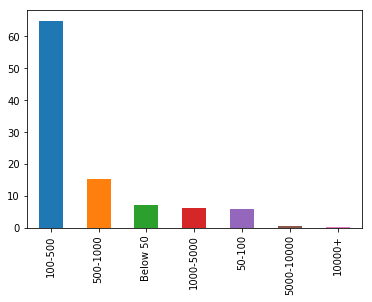

In [29]:
(basket_price.Price_Category.value_counts()/basket_price.shape[0]*100).plot(kind='bar')

### Insight for Products

In [30]:
#using project description for insight 
import nltk, warnings
def keyword_inventory(df, column='Description'):
    stemmer= nltk.stem.SnowballStemmer("english")
    keywords_roots= dict()
    keywords_select= dict()
    category_keys   = []
    count_keywords  = dict()
    icount=0
    for word in df[column]:
        if pd.isnull(word):continue
        line= word.lower()
        tokenized= nltk.word_tokenize(line)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if pos.startswith('N')]
        for t in nouns:
            root= stemmer.stem(t)
            if root in keywords_roots:
                keywords_roots[root].add(t)
                count_keywords[root]+=1
            else:
                keywords_roots[root]= {t}
                count_keywords[root]=1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords
    

In [31]:
df_produits = pd.DataFrame(df_start['Description'].unique()).rename(columns = {0:'Description'})

In [32]:
keywords, keywords_roots, keywords_select, count_keywords = keyword_inventory(df_produits)

Nb of keywords in variable 'Description': 1483


In [33]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

In [34]:
temp=pd.DataFrame(list_products,columns=['Product','Count'])

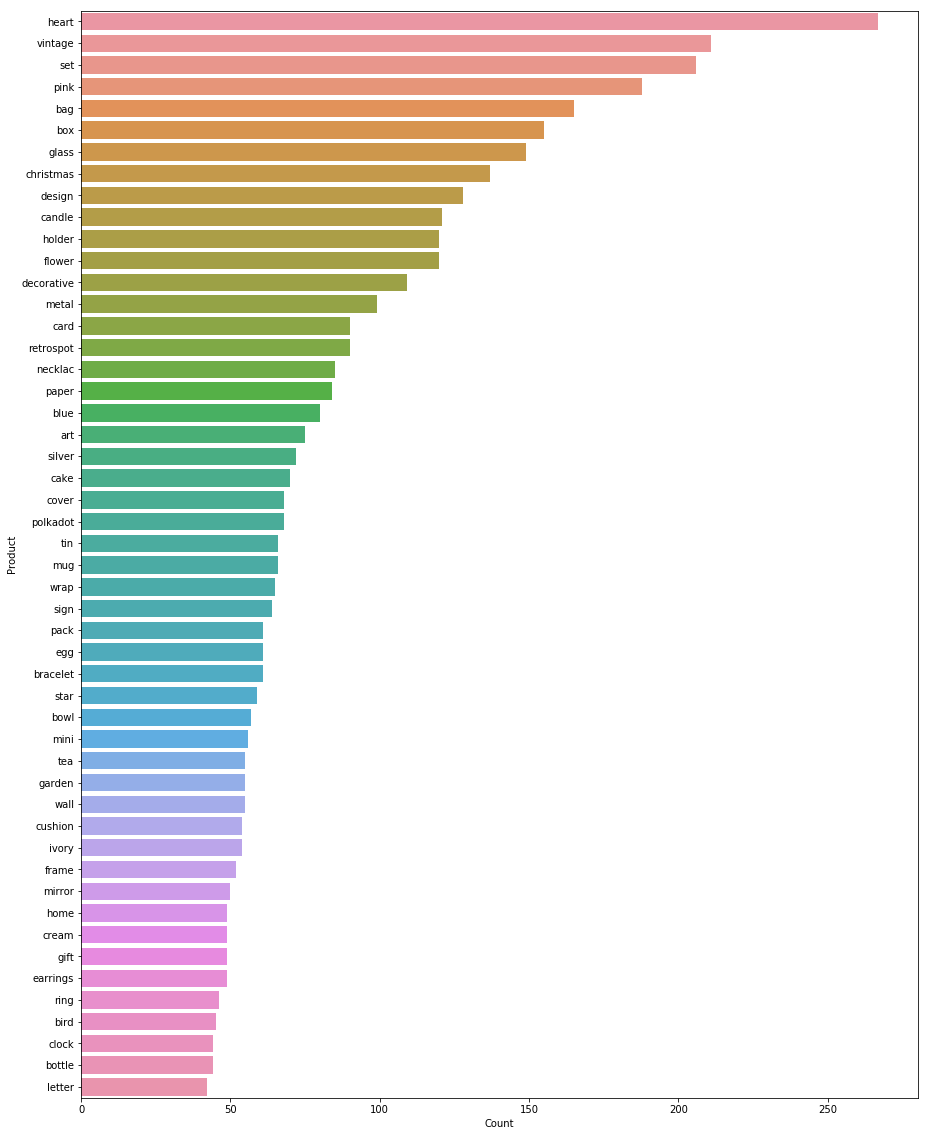

In [40]:
plt.figure(figsize=(15,20))
sns.barplot(temp.Count[:50],temp.Product[:50])

In [123]:
color=['pink', 'blue', 'tag', 'green', 'orange']
list_products= temp[[len(product)>3 and product not in color for product in temp.Product ] and temp.Count>=15]

In [142]:
liste_produits = df_cleaned['Description'].unique()
X = pd.DataFrame()
for product in list_products.Product.tolist():
    X.loc[:,product]=list(map(lambda x:int(product.upper() in x),liste_produits))

In [170]:
X[:2]

,heart,vintage,glass,christmas,design,candle,holder,flower,decorative,metal,card,retrospot,necklac,paper,silver,cake,cover,polkadot,wrap,sign,pack,bracelet,star,bowl,mini,garden,wall,cushion,ivory,frame,mirror,home,cream,gift,earrings,ring,bird,clock,bottle,letter,party,paisley,charm,wood,ribbon,garland,gold,hook,easter,bead,zinc,drawer,water,photo,bell,pencil,tray,plate,skull,butterfly,spot,children,enamel,case,sweetheart,tissue,round,sticker,stand,spaceboy,diamante,cutlery,light,rabbit,pantry,magnet,tree,union,lunch,colour,book,storage,bunny,chocolate,hair,basket,birthday,feltcraft,coffee,trinket,gingham,flock,door,drop,fairy,reel,antique,london,t-light,wire,towel,notebook,baroque,cabinet,retro,babushka,sweet,number,shell,woodland,apple,tube,strawberry,daisy,jack,wicker,kitchen,style,purse,dinner,hand,hanger,table,chick,leaf,doiley,knob,ball,tape,doormat,stripe,warmer,wreath,shape,doilies,parasol,travel,cherry,regency,biscuit,cottage,money,coaster,rack,image,dish,jigsaw,medium,incense,crystal,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [144]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [169]:
X[:5]

,heart,vintage,glass,christmas,design,candle,holder,flower,decorative,metal,card,retrospot,necklac,paper,silver,cake,cover,polkadot,wrap,sign,pack,bracelet,star,bowl,mini,garden,wall,cushion,ivory,frame,mirror,home,cream,gift,earrings,ring,bird,clock,bottle,letter,party,paisley,charm,wood,ribbon,garland,gold,hook,easter,bead,zinc,drawer,water,photo,bell,pencil,tray,plate,skull,butterfly,spot,children,enamel,case,sweetheart,tissue,round,sticker,stand,spaceboy,diamante,cutlery,light,rabbit,pantry,magnet,tree,union,lunch,colour,book,storage,bunny,chocolate,hair,basket,birthday,feltcraft,coffee,trinket,gingham,flock,door,drop,fairy,reel,antique,london,t-light,wire,towel,notebook,baroque,cabinet,retro,babushka,sweet,number,shell,woodland,apple,tube,strawberry,daisy,jack,wicker,kitchen,style,purse,dinner,hand,hanger,table,chick,leaf,doiley,knob,ball,tape,doormat,stripe,warmer,wreath,shape,doilies,parasol,travel,cherry,regency,biscuit,cottage,money,coaster,rack,image,dish,jigsaw,medium,incense,crystal,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [146]:
print("{:<8} {:<20} \n".format('gamme', 'nb. produits') + 20*'-')

gamme    nb. produits         
--------------------


For n_clusters = 2 The average silhouette_score is : 0.0912780616525468
For n_clusters = 3 The average silhouette_score is : 0.1360782471194816
For n_clusters = 4 The average silhouette_score is : 0.16142659965203177
For n_clusters = 5 The average silhouette_score is : 0.19528370472144307
For n_clusters = 6 The average silhouette_score is : 0.19564483912780575
For n_clusters = 7 The average silhouette_score is : 0.2087971894121846


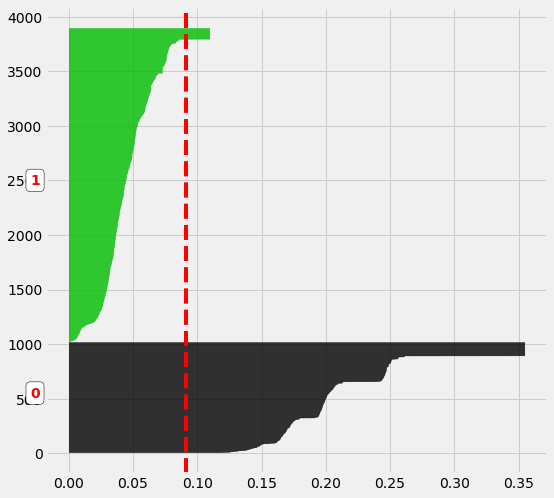

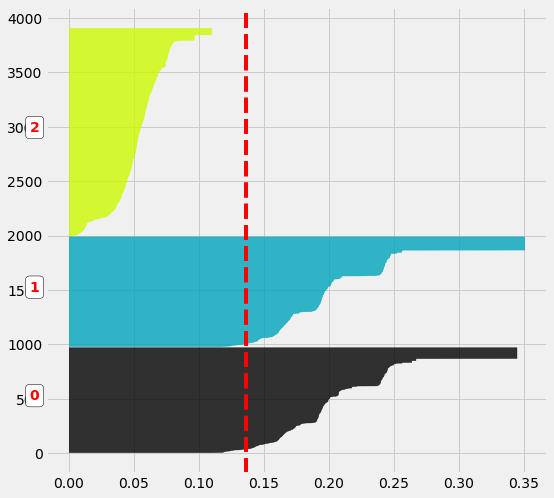

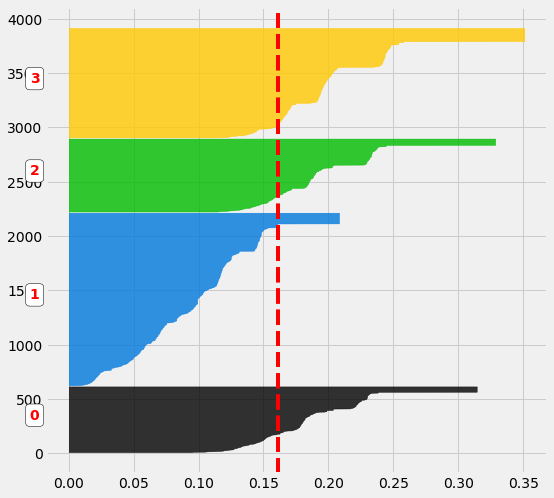

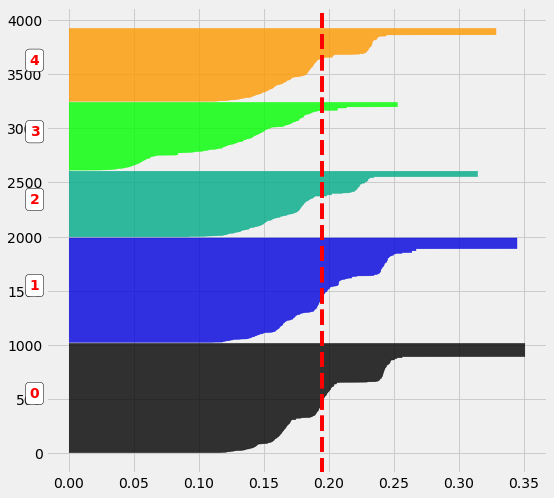

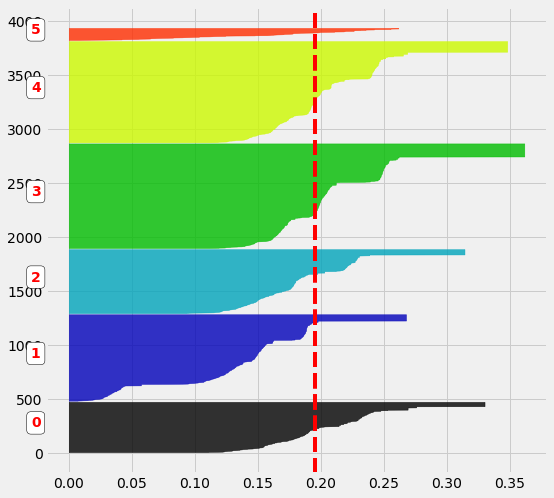

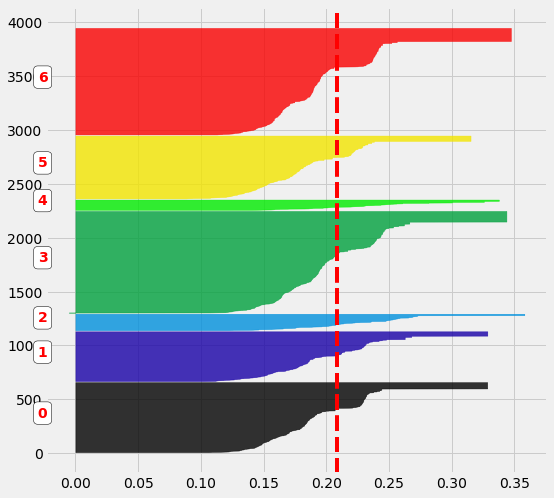

In [167]:
for n_clusters in range(2,8):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, clusters)
    
    #plt.rcParams["patch.force_edgecolor"] = True
    #plt.style.use('fivethirtyeight')
    #mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    #ax1.set_xlim([lim_x[0], lim_x[1]])
    #ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

In [171]:
n_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters)
    
#km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
#clusters = km.fit_predict(matrix)
#silhouette_avg = silhouette_score(matrix, clusters)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.19528370472144307


In [224]:
from wordcloud import WordCloud, STOPWORDS
liste = pd.DataFrame(liste_produits)
liste_words = list_products.Product.tolist()

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))


def make_word_cloud(dictionory,iteration,fig):
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', max_words=1628,relative_scaling=1,
                          normalize_plurals=False)
    ax = fig.add_subplot(4,2,iteration)
    wordcloud.generate_from_frequencies(occurence[i])
    plt.title('cluster nº{}'.format(i))
    plt.imshow(wordcloud, interpolation="bilinear")







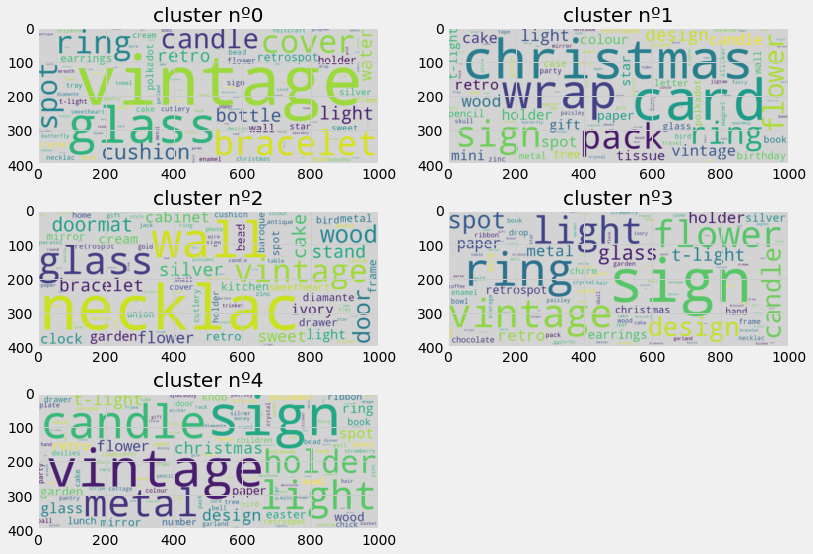

In [225]:
for i in range(n_clusters):
    fig = plt.figure(1, figsize=(12,12))
    make_word_cloud(occurence[i],i+1,fig)

In [226]:
liste_produits

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [227]:
# product category cluster for the product
corresp = dict()
for key, val in zip (liste_produits, clusters):
    corresp[key] = val 
#__________________________________________________________________________
df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)

In [228]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,0,15.30,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,0,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,0,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,0,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,0,20.34,0


In [229]:
for i in range(n_clusters):
    col='categ_{}'.format(i)
    df_temp= df_cleaned[df_cleaned.categ_product==i]
    price_temp= df_temp.UnitPrice* (df_cleaned.Quantity- df_cleaned.QuantityCanceled)
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:,col]=price_temp
    df_cleaned[col].fillna(0, inplace = True)

In [230]:
df_cleaned[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,0,15.30,3,0.00,0.0,0.0,15.3,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,0,20.34,0,20.34,0.0,0.0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,0,22.00,0,22.00,0.0,0.0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,0,20.34,0,20.34,0.0,0.0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,0,20.34,0,20.34,0.0,0.0,0.0,0.0


In [232]:
for i in range(n_clusters):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:,col]= temp

In [233]:
basket_price[:5]

,CustomerID,InvoiceNo,InvoiceDate,BasketPrice,Price_Category,categ_0,categ_1,categ_2,categ_3,categ_4
0,12346,541431,2011-01-18,77183.60,10000+,0.00,0.00,0.00,0.00,77183.6
1,12347,537626,2010-12-07,711.79,500-1000,293.35,23.40,124.44,83.40,187.2
2,12347,542237,2011-01-26,475.39,100-500,169.20,84.34,38.25,53.10,130.5
3,12347,549222,2011-04-07,636.25,500-1000,115.00,81.00,38.25,71.10,330.9
4,12347,556201,2011-06-09,382.52,100-500,168.76,41.40,19.90,78.06,74.4
